In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [7]:
df = pd.read_excel('data.xls')
df.head()

,Unnamed: 0,Price,Area,Longitude,Latitude,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits
0,0,6700,65.00,121.489484,31.240373,2.0,0,NaN,NaN,1.0,NaN,NaN
1,1,8500,91.00,121.460855,31.295211,2.0,2,NaN,NaN,1.0,NaN,NaN
2,2,2600,56.07,121.440338,31.419139,2.0,1,NaN,NaN,0.0,NaN,NaN
3,3,5500,84.00,121.460855,31.295211,2.0,2,NaN,NaN,1.0,NaN,NaN
4,4,6800,78.00,121.543922,31.278916,1.0,2,NaN,NaN,1.0,NaN,NaN


In [8]:
df = df[['Longitude', 'Latitude', 'Price']]
df = df.rename(columns={"Longitude": "lng", "Latitude": "lat"})
df.drop(df[df['lng'] < 120.81].index, inplace = True)
df.drop(df[df['lng'] > 122.12].index, inplace = True)
df.drop(df[df['lat'] < 30.40].index, inplace = True)
df.drop(df[df['lat'] > 31.53].index, inplace = True)
df.drop(df[df['Price'] > 10000].index, inplace = True)
df.head()

,lng,lat,Price
0,121.489484,31.240373,6700
1,121.460855,31.295211,8500
2,121.440338,31.419139,2600
3,121.460855,31.295211,5500
4,121.543922,31.278916,6800


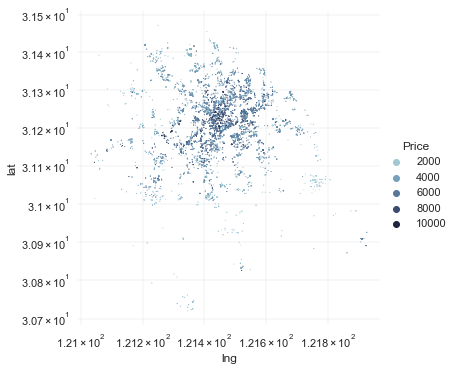

In [21]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="lng", y="lat",
    hue="Price",
    palette=cmap, sizes=(10, 200),
    edgecolor=None,
    s=1
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)